In [11]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/lmanikon/lmanikon.github.io/master/teaching/datasets/bostonHousing.csv')
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
# remove the null values Split the data into X and y -- X featiire set; y-class label variable

print(len(df))
print(df.isna().sum())
df.dropna(inplace=True)
print(len(df))

511
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
506


In [14]:
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

In [15]:
y.describe()

count    506.000000
mean      22.711858
std        9.520520
min        5.000000
25%       17.025000
50%       21.200000
75%       25.075000
max       67.000000
Name: MEDV, dtype: float64

In [17]:
# y_new -- <21.2 -- 1; >= 21.2 -- 2
import numpy as np

bins = np.array([0, 21.2, 68])
y_new = np.digitize(y, bins)
set(y_new)

{1, 2}

In [18]:
# Standardize the data

from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1234)
model = dt.fit(X_std, y_new)

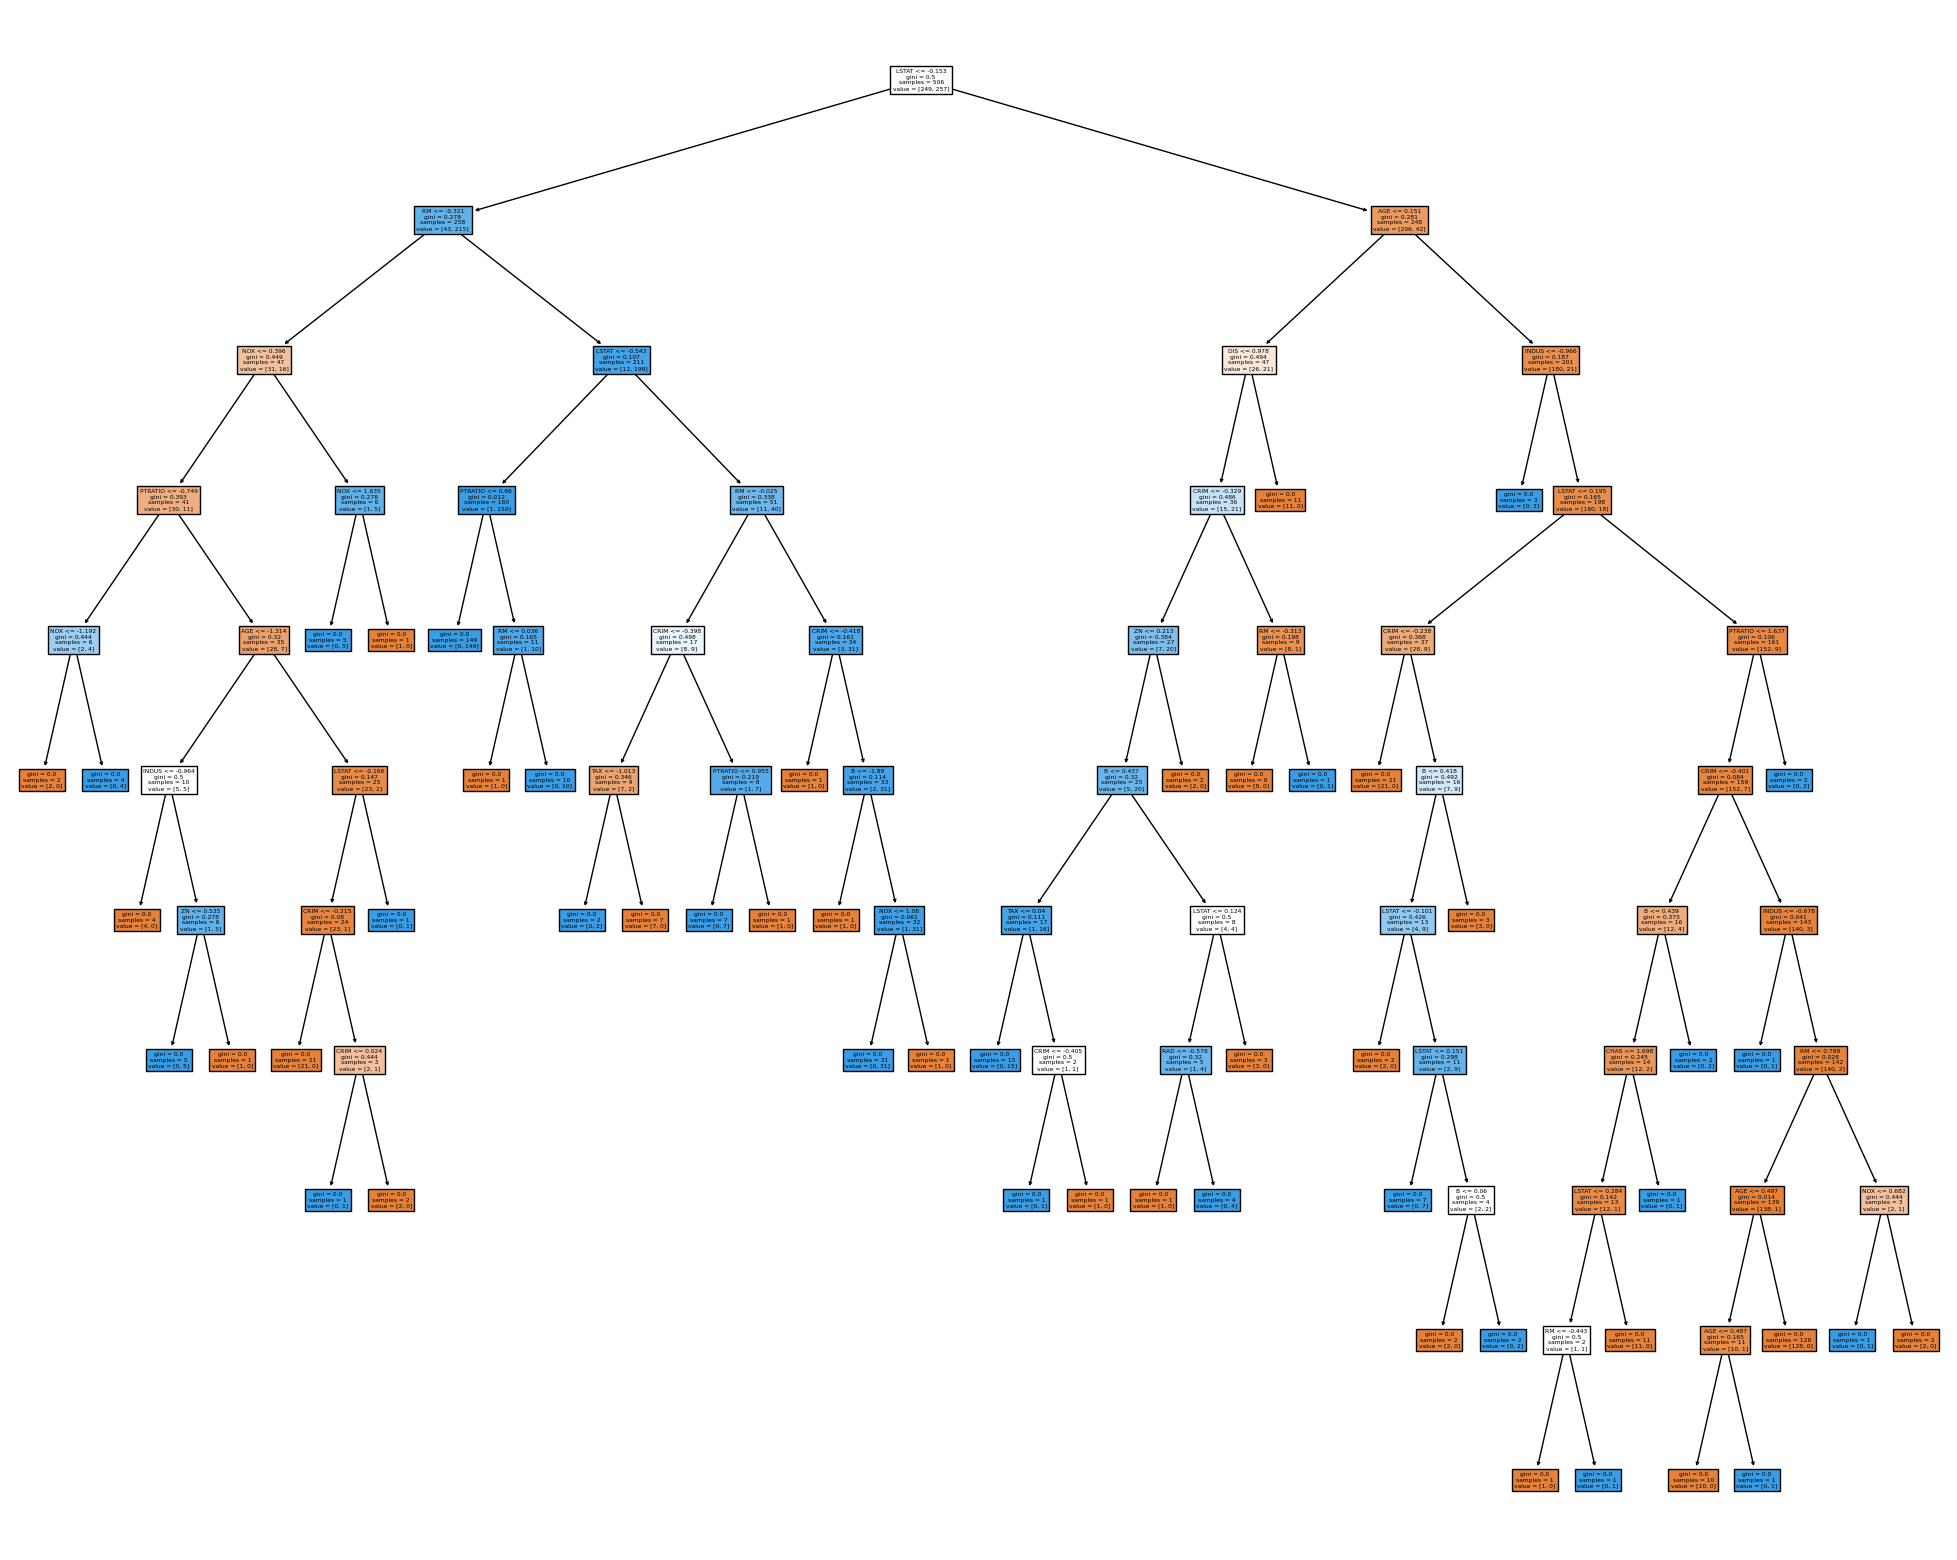

In [23]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, feature_names=list(X.columns), filled=True)

In [24]:
importances = model.feature_importances_
print(importances)

[0.08242041 0.01596066 0.04012254 0.00625618 0.04327691 0.14414518
 0.05311139 0.02266987 0.00632569 0.01578839 0.030681   0.04287906
 0.49636272]


In [28]:
rankfeats = dict(zip(list(X.columns), importances))
import operator

sorted_dt = sorted(rankfeats.items(), key=operator.itemgetter(1), reverse=True)

for i in range(len(sorted_dt)):
  print(sorted_dt[i][0]+": "+str(round(sorted_dt[i][1], 3)))

LSTAT: 0.496
RM: 0.144
CRIM: 0.082
AGE: 0.053
NOX: 0.043
B: 0.043
INDUS: 0.04
PTRATIO: 0.031
DIS: 0.023
ZN: 0.016
TAX: 0.016
RAD: 0.006
CHAS: 0.006
